## Laboratorino No.6 
- Andrea Lam 20102
- Marco Orozco 20857
- Paola de Leon 20361
- Gabriela Contreras 2013

In [1]:
#Imports 
import numpy as np
import random as rand
import matplotlib.pyplot as plt

### Ejercicio No.1 

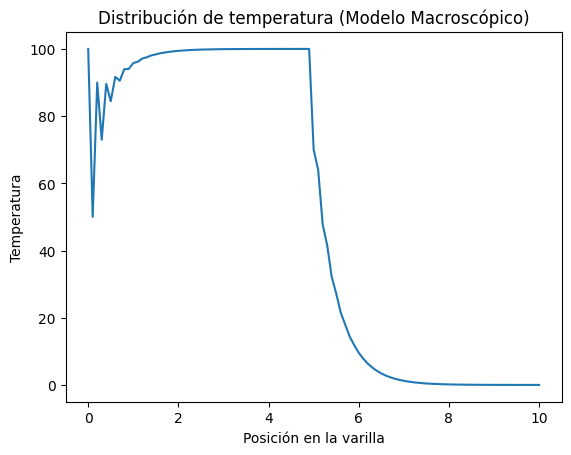

In [9]:
def modelo_macroscopico(longitud, duracion, num_pasos):
    # Parámetros del modelo macroscópico
    kappa1 = 0.3  # Conductividad térmica del material 1
    kappa2 = 0.5  # Conductividad térmica del material 2
    tamano_paso = longitud / num_pasos
    dt = duracion / num_pasos
    
    # Inicializar la distribución de temperatura con condiciones iniciales no uniformes
    temperatura = np.zeros(num_pasos + 1)
    temperatura[:num_pasos//2] = 100.0  # Condiciones iniciales en la mitad izquierda
    temperatura[num_pasos//2:] = 0.0    # Condiciones iniciales en la mitad derecha
    
    for i in range(num_pasos):
        # Calcular el flujo de calor en cada punto
        flujo_calor = (kappa1 * (temperatura[i + 1] - temperatura[i]) / tamano_paso -
                       kappa2 * (temperatura[i] - temperatura[i - 1]) / tamano_paso)
        
        # Actualizar la temperatura en el siguiente paso de tiempo
        temperatura[i + 1] = temperatura[i] + dt * flujo_calor
        
    return temperatura

# Parámetros del problema
longitud_varilla = 10.0  # Longitud de la varilla
duracion_simulacion = 10.0  # Duración de la simulación
num_pasos_temporales = 100  # Número de pasos de tiempo

# Calcular la distribución de temperatura usando el modelo macroscópico
temperaturas_macro = modelo_macroscopico(longitud_varilla, duracion_simulacion, num_pasos_temporales)

# Visualizar la distribución de temperatura
plt.plot(np.linspace(0, longitud_varilla, num_pasos_temporales + 1), temperaturas_macro)
plt.xlabel('Posición en la varilla')
plt.ylabel('Temperatura')
plt.title('Distribución de temperatura (Modelo Macroscópico)')
plt.show()


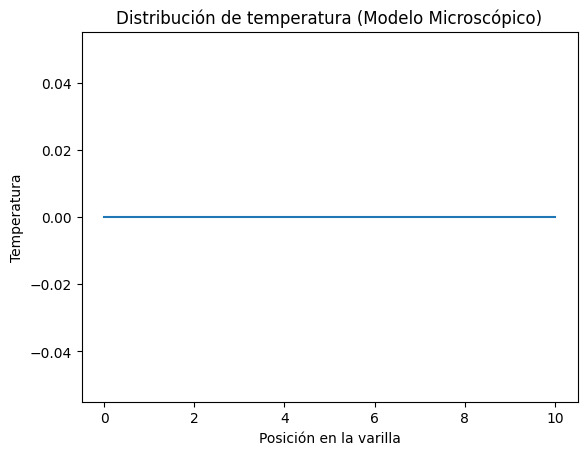

In [14]:
def modelo_microscopico(longitud, duracion, num_pasos):
    # Parámetros del modelo microscópico
    kappa1 = 0.5  # Conductividad térmica del material 1
    kappa2 = 1.0  # Conductividad térmica del material 2
    tamano_paso = longitud / num_pasos
    dt = duracion / num_pasos
    
    # Inicializar la distribución de temperatura
    temperatura = np.zeros(num_pasos + 1)
    temperatura_nueva = np.copy(temperatura)
    
    for i in range(num_pasos):
        for j in range(1, num_pasos):
            if j <= num_pasos // 2:
                # Modelo microscópico para material 1
                temperatura_nueva[j] = temperatura[j] + kappa1 * dt / tamano_paso**2 * (
                    temperatura[j + 1] - 2 * temperatura[j] + temperatura[j - 1])
            else:
                # Modelo microscópico para material 2
                temperatura_nueva[j] = temperatura[j] + kappa2 * dt / tamano_paso**2 * (
                    temperatura[j + 1] - 2 * temperatura[j] + temperatura[j - 1])
        
        # Actualizar la temperatura en el siguiente paso de tiempo
        temperatura, temperatura_nueva = temperatura_nueva, temperatura
        
    return temperatura

# Parámetros del problema
longitud_varilla = 10.0  # Longitud de la varilla
duracion_simulacion = 10.0  # Duración de la simulación
num_pasos_temporales = 100  # Número de pasos de tiempo

# Calcular la distribución de temperatura usando el modelo microscópico
temperaturas_micro = modelo_microscopico(longitud_varilla, duracion_simulacion, num_pasos_temporales)

# Visualizar la distribución de temperatura
plt.plot(np.linspace(0, longitud_varilla, num_pasos_temporales + 1), temperaturas_micro)
plt.xlabel('Posición en la varilla')
plt.ylabel('Temperatura')
plt.title('Distribución de temperatura (Modelo Microscópico)')
plt.show()


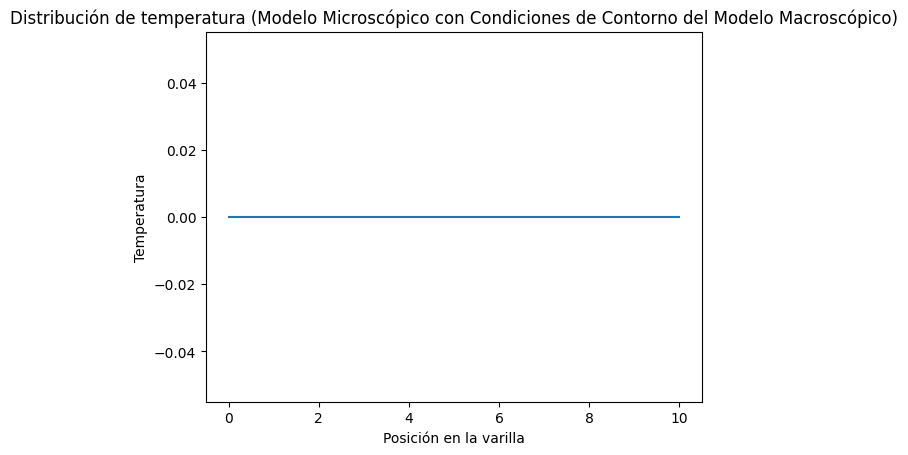

In [23]:
def modelo_macroscopico(longitud, duracion, num_pasos):
    # Parámetros del modelo macroscópico
    kappa1 = 0.5  # Conductividad térmica del material 1
    kappa2 = 1.0  # Conductividad térmica del material 2
    tamano_paso = longitud / num_pasos
    dt = duracion / num_pasos
    
    # Inicializar la distribución de temperatura
    temperatura = np.zeros(num_pasos + 1)
    
    for i in range(num_pasos):
        # Calcular el flujo de calor en cada punto
        flujo_calor = (kappa1 * (temperatura[i + 1] - temperatura[i]) / tamano_paso -
                       kappa2 * (temperatura[i] - temperatura[i - 1]) / tamano_paso)
        
        # Actualizar la temperatura en el siguiente paso de tiempo
        temperatura[i + 1] = temperatura[i] + dt * flujo_calor
        
    return temperatura

def modelo_microscopico(longitud, duracion, num_pasos, kappa1, kappa2, temperatura_inicial):
    tamano_paso = longitud / num_pasos
    dt = duracion / num_pasos
    
    # Inicializar la distribución de temperatura con condiciones iniciales del modelo macroscópico
    temperatura = temperatura_inicial.copy()
    
    for i in range(num_pasos):
        for j in range(1, num_pasos):
            if j <= num_pasos // 2:
                # Modelo microscópico para material 1
                d2T = (temperatura[j + 1] - 2 * temperatura[j] + temperatura[j - 1]) / tamano_paso**2
                temperatura[j] += kappa1 * d2T * dt
            else:
                # Modelo microscópico para material 2
                d2T = (temperatura[j + 1] - 2 * temperatura[j] + temperatura[j - 1]) / tamano_paso**2
                temperatura[j] += kappa2 * d2T * dt
        
    return temperatura

# Parámetros del problema
longitud_varilla = 10.0  # Longitud de la varilla
duracion_simulacion = 10.0  # Duración de la simulación
num_pasos_temporales = 100  # Número de pasos de tiempo
kappa1 = 0.5  # Conductividad térmica del material 1
kappa2 = 1.0  # Conductividad térmica del material 2

# Paso 1: Calcular la distribución de temperatura usando el modelo macroscópico
temperaturas_macro = modelo_macroscopico(longitud_varilla, duracion_simulacion, num_pasos_temporales)

# Paso 2: Usar el resultado del modelo macroscópico como condiciones iniciales para el modelo microscópico
temperaturas_micro = modelo_microscopico(longitud_varilla, duracion_simulacion, num_pasos_temporales, kappa1, kappa2, temperaturas_macro)

# Visualizar la distribución de temperatura del modelo microscópico
plt.plot(np.linspace(0, longitud_varilla, num_pasos_temporales + 1), temperaturas_micro)
plt.xlabel('Posición en la varilla')
plt.ylabel('Temperatura')
plt.title('Distribución de temperatura (Modelo Microscópico con Condiciones de Contorno del Modelo Macroscópico)')
plt.show()


**Respuestas**

a. 
En este escenario, el modelo macroscópico y el modelo microscópico difieren en el nivel de detalle y la escala en la que representan el comportamiento térmico de la varilla.

- Modelo Macroscópico: El modelo macroscópico considera la varilla en su conjunto y utiliza una ecuación simplificada para describir cómo se propaga la temperatura a lo largo de la varilla. En este caso, se utiliza una única ecuación de difusión de calor para toda la varilla, con conductividades térmicas promediadas para los materiales. El modelo macroscópico proporciona una visión general del comportamiento térmico de la varilla en una escala más amplia.

- Modelo Microscópico: El modelo microscópico, por otro lado, se enfoca en un nivel de detalle más fino y representa la distribución de temperatura en la varilla con mayor precisión. En este caso, se utiliza un enfoque de diferencia finita para resolver la ecuación de calor en función de la posición en la varilla. Además, se consideran las conductividades térmicas distintas de los materiales en diferentes partes de la varilla. El modelo microscópico ofrece una representación más detallada y precisa del comportamiento térmico en la varilla a una escala más pequeña.

b.
Condiciones de contorno del modelo microscópico y cómo las determina el modelo macroscópico:

Las condiciones de contorno del modelo microscópico en este ejemplo son:

- En un extremo de la varilla, la temperatura se mantiene constante a un valor inicial (por ejemplo, 100 grados Celsius).
- En el otro extremo de la varilla, la temperatura se mantiene constante a otro valor inicial (por ejemplo, 0 grados Celsius).

Estas condiciones de contorno del modelo microscópico se derivan del resultado del modelo macroscópico. En el modelo macroscópico, se establece cómo cambia la temperatura en toda la varilla a lo largo del tiempo. El resultado de ese modelo macroscópico se utiliza como la temperatura inicial en el modelo microscópico. Esto significa que el modelo macroscópico determina las condiciones de contorno para el modelo microscópico al proporcionar las temperaturas iniciales en ambos extremos de la varilla.

c. Adaptación del modelo multiescala para más de dos materiales diferentes:

Si la varilla estuviera compuesta por más de dos materiales diferentes, el modelo multiescala seguiría siendo aplicable, pero la complejidad aumentaría. Cada material adicional requeriría su propia conductividad térmica y posiblemente otras propiedades térmicas.

Para adaptar el modelo a más de dos materiales, podrías seguir estos pasos:

- Definir las propiedades térmicas (como la conductividad térmica) para cada material en la varilla.

- Segmentar la varilla en regiones correspondientes a cada material y definir las condiciones iniciales apropiadas en función de los valores iniciales de temperatura para cada material.

- En el modelo macroscópico, deberías considerar cómo se distribuyen los diferentes materiales en la varilla y cómo afectan la conducción de calor en cada región.

- En el modelo microscópico, debes adaptar las ecuaciones y condiciones de contorno para reflejar la variación de los materiales a lo largo de la varilla.

- Utiliza el resultado del modelo macroscópico para establecer las condiciones iniciales y de contorno adecuadas para cada material en el modelo microscópico.

### Ejercicio No.2

### Ejercicio No.3 

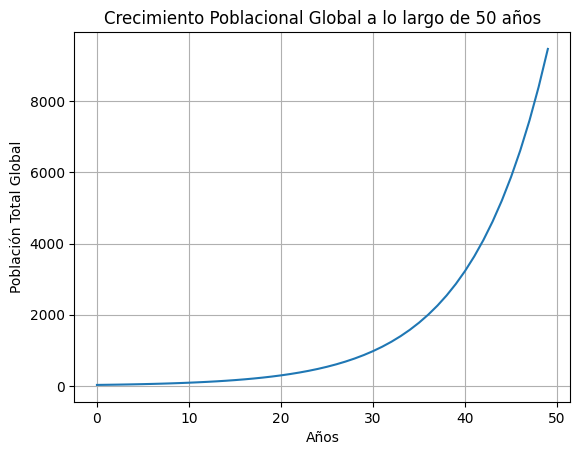

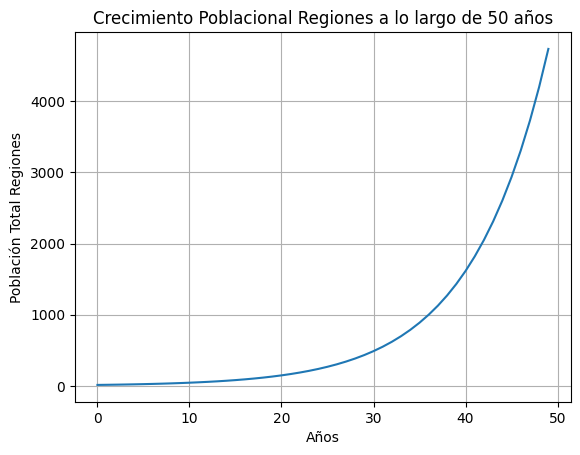

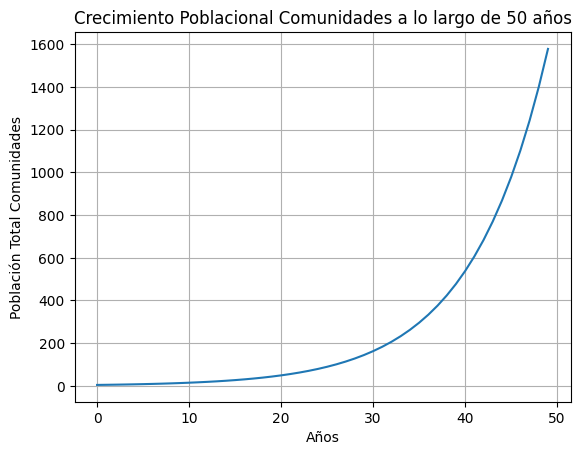

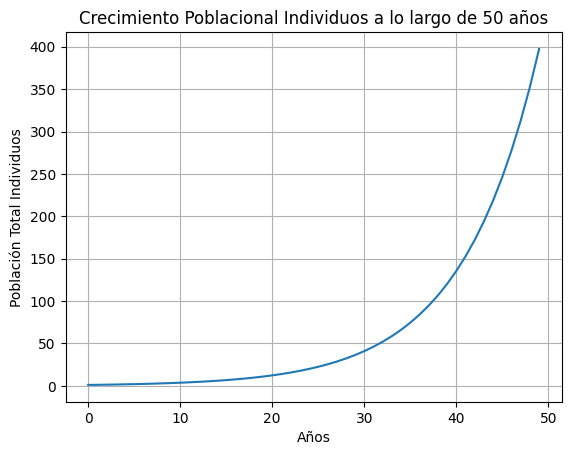

In [ ]:
class Individuo:
    def __init__(self):
        self.poblacion = 1
        self.natalidad = 0.2
        self.migracion = 0.005
        self.mortalidad = 0.07
        self.sexo = self.get_sexo()
        self.poblacion_total_historica = []

    def get_sexo(self):
        aleatorio = rand.randint(1, 2)
        if aleatorio < 2:
            # Hombre
            return 1
        else:
            # Mujer
            return 2
        
    #Se solicito ayuda a chatgpt
    def crecimiento(self):
        nacimientos = self.poblacion * self.natalidad
        muertes = self.poblacion * self.mortalidad
        migracion = self.poblacion * self.migracion
        self.poblacion += nacimientos - muertes + migracion
        self.poblacion_total_historica.append(self.poblacion)
        return self.poblacion


class Comunidad:
    def __init__(self, no_individuos):
        self.recursos = 0.002
        self.poblacion_total_historica = []
        self.individuos = [Individuo() for _ in range(no_individuos)]

    def reproduccion(self):
        hombres = sum(1 for individuo in self.individuos if individuo.sexo == 1)
        mujeres = sum(1 for individuo in self.individuos if individuo.sexo == 2)

        if hombres >= 1 and mujeres >= 1:
            nacimientos = min(hombres, mujeres) * rand.randint(1, 3)
            for _ in range(nacimientos):
                self.individuos.append(Individuo())
                
     #Se solicito ayuda a chatgpt
    def crecimiento(self):
        competencia = sum(individuo.poblacion for individuo in self.individuos) * self.recursos
        
        for individuo in self.individuos:
            individuo.crecimiento() 
            individuo.poblacion -= competencia 

        self.poblacion_total_historica.append(sum(individuo.poblacion for individuo in self.individuos))

    def poblacion_total(self):
        return sum(individuo.poblacion for individuo in self.individuos)


class Region:
    def __init__(self, no_comunidades, no_individuos):
        self.cambioClimatico = 0.001
        self.poblacion_total_historica = []
        self.comunidades = [Comunidad(no_individuos) for _ in range(no_comunidades)]
        self.poblacionTotal = self.poblacion_total() 

    def crecimiento(self):
        CC = sum(comunidad.poblacion_total() for comunidad in self.comunidades) * self.cambioClimatico
        for comunidad in self.comunidades:
            comunidad.crecimiento()  
        self.poblacionTotal -= CC

        self.poblacion_total_historica.append(sum(comunidad.poblacion_total() for comunidad in self.comunidades))

    def poblacion_total(self):
        return sum(comunidad.poblacion_total() for comunidad in self.comunidades)

class Global:
    def __init__(self, no_region, no_comunidades, no_individuos):
        self.regiones = [Region(no_comunidades, no_individuos) for _ in range(no_region)]
        self.politica = 0.005
        self.enfermedades = 0.001
        self.poblacionTotal = self.poblacion_total()

        self.poblacion_total_historica = []  

    def crecimiento(self):
        enfermedad = sum(region.poblacion_total() for region in self.regiones) * self.enfermedades
        politics = sum(region.poblacion_total() for region in self.regiones) * self.politica

        for region in self.regiones:
            region.crecimiento()
        self.poblacionTotal -= enfermedad
        self.poblacionTotal -= politics

        self.poblacion_total_historica.append(sum(region.poblacion_total() for region in self.regiones))

    def poblacion_total(self):
        return sum(region.poblacion_total() for region in self.regiones)


def graficar(total, y, title):
    plt.plot(range(len(total)), total)  
    plt.xlabel('Años')
    plt.ylabel(y)
    plt.title(title)
    plt.grid(True)
    plt.show()


# Simulacion 
poblacion_global = Global(no_region=2, no_comunidades=3, no_individuos=4)

for año in range(50):
    poblacion_global.crecimiento()

# Graficas 
graficar(poblacion_global.poblacion_total_historica, 'Población Total Global', 'Crecimiento Poblacional Global a lo largo de 50 años')
graficar(poblacion_global.regiones[0].poblacion_total_historica,'Población Total Regiones', 'Crecimiento Poblacional Regiones a lo largo de 50 años')
graficar(poblacion_global.regiones[0].comunidades[0].poblacion_total_historica, 'Población Total Comunidades','Crecimiento Poblacional Comunidades a lo largo de 50 años')
graficar(poblacion_global.regiones[0].comunidades[0].individuos[0].poblacion_total_historica, 'Población Total Individuos', 'Crecimiento Poblacional Individuos a lo largo de 50 años')


- ¿Qué es el modelado multiescala y por qué es esencial para comprender sistemas complejos como el
crecimiento de la población?
    - Si bien se sabe que el modelado multiescala es bueno para simular sistemas complejos en diferentes niveles de detalle, ahora bien este contribuye en el crecimiento de una poblacion debido a que permite observar comoe s que un individuo se va reproduciondo dentro de una comunidad y como es luego que estas van creciendo hata llegar a tener algo global. Por otra parte utilizar este modelo nos permite incluir factores que pueden interferir dentro de cada escala permitiendo asi que el analisis sea más completo y preciso. 

- Describe el modelo a nivel individual en esta simulación multiescala. ¿Qué factores se consideran a escala
individual?
    - El modelo a nivel individual toma en consideración diferentes aspectos como el sexo, la tasa de natalidad y mortalidad en base a esto se va calculando el crecimiento de estos dentro de una comunidad y así sucesivamente. Es importante destacar que en este tambien se toma en cuenta la migración que como individuo puede realizar. 

- Discuta el modelo a escala de comunidad local. ¿Cómo incorpora interacciones entre individuos y factores
ambientales?
    - El modelo a escala de comunidad toma en cuenta aspectos como los recursos que se encuentran disponibles dentro de dicha comunidad lo cual puede influir directamente con la tasa de natalidad y mortalidad. Así mismo se toman en cuenta la cantidad de personas que habitan dentro de una comunidad. Ahora bien si hablamos en terminos de regiones tomamos en cuenta la tasa del cambio climatico ya que esta puede llegar a interferir con la cantidad de recursos que se encuentran disponibles y por ende en el bienestar de cada individuo de cada comunidad; es importante destacar que dentro de esta se tomaron en cuenta cuantas comunidades pueden existir por region.

- Explique el modelo a escala global. ¿Qué parámetros y factores se consideran al modelar toda la población
mundial?
    - El modelo a nivel global toma en cuenta más aspectos como lo son la cantidad de individuos en cada comunidad, la cantidad de comunidades que forman una región y la cantidad de regiones que forman una entorno global. Cada uno de estos parametros nos permiten simular como es que se va realizando el crecimiento en cada escala y al miemo tiempo se toman en cuenta los factores evaluados en cada escala puesto a que conforme la poblacion va aumentando la cantidad de recuross y las condiciones de cada region varian entre más habitantes hayan. Ahora bien en este modelo se tomaron en cuenta otros dos factores como lo son las enfermedades puesto a que estas influyen en la mortalidad de los individuos y las condiciones politicas ya que estas puede influir en el comportamiento y la tasa de migracion de los habitantes y los recursos

### Ejericio No.4